In [5]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

In [2]:
rewards_dqn_cnn_v1 = np.loadtxt('../outputs/dqn-cnn/dqn-cnn-v1.txt')
rewards_dqn_cnn_v2 = np.loadtxt('../outputs/dqn-cnn/dqn-cnn-v2.txt')
rewards_dqn_cnn_v3 = np.loadtxt('../outputs/dqn-cnn/dqn-cnn-v3.txt')
rewards_dqn_cnn_v4 = np.loadtxt("../outputs/copy/dqn-cnn-v4.txt")

In [3]:
def running_average(window_size, data):
    average_data = []
    for ind in range(len(data) - window_size + 1):
        average_data.append(np.mean(data[ind:ind+window_size]))
    for ind in range(window_size - 1):
        average_data.insert(0, np.nan)
    return average_data

Text(0, 0.5, 'Episode Reward')

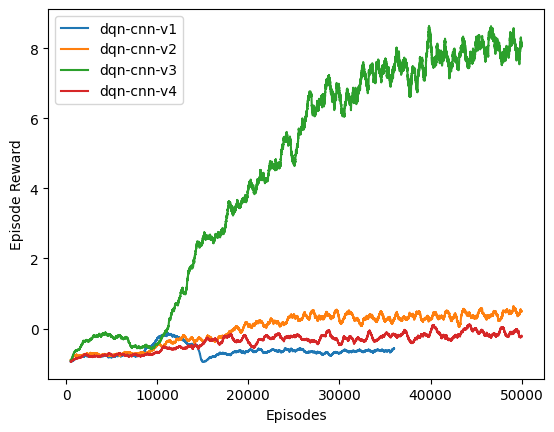

In [20]:
plt.plot(running_average(500,rewards_dqn_cnn_v1), label='dqn-cnn-v1')
plt.plot(running_average(500, rewards_dqn_cnn_v2), label='dqn-cnn-v2')
plt.plot(running_average(500,rewards_dqn_cnn_v3), label='dqn-cnn-v3')
plt.plot(running_average(500, rewards_dqn_cnn_v4), label='dqn-cnn-v4')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Episode Reward')

In [12]:
results = dict()
for file in os.listdir('../results/'):
    with open(f'../results/{file}', 'r') as f:
        results[file] = json.loads(f.read())

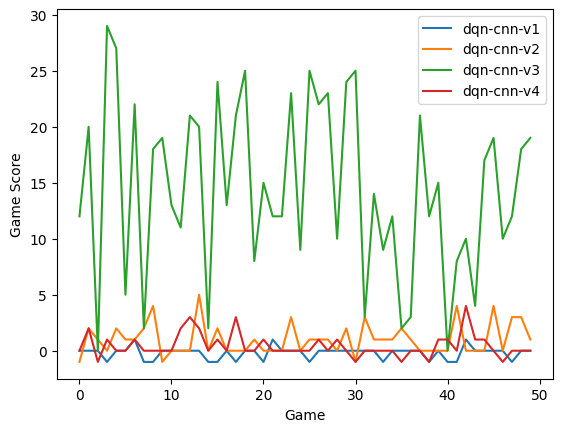

In [22]:
for file in results.keys():
    plt.plot(results[file]['rewards'], label=file[:-5])
plt.ylabel('Game Score')
plt.xlabel('Game')
plt.legend()

In [27]:
for file in results.keys():
    print('stats for', file[:-5])
    print(f'max: {np.max(results[file]["rewards"])}')
    print(f'min: {np.min(results[file]["rewards"])}')
    print(f'average: {np.mean(results[file]["rewards"])}')
    print('===============================')
    

stats for dqn-cnn-v1
max: 1
min: -1
average: -0.2
stats for dqn-cnn-v2
max: 5
min: -1
average: 1.0
stats for dqn-cnn-v3
max: 29
min: 0
average: 14.4
stats for dqn-cnn-v4
max: 4
min: -1
average: 0.42


In [5]:
def plot_reward_distribution(data, agent):
    plt.hist(data)
    plt.title(f'Reward distribution for {agent}')